# Prueba Algortima K-means tecnica de clusterizacion


In [3]:
#Importamos librerias necesarias en la ejecucion 
# !pip install matplotlib seaborn numpy pandas scipy scikit-learn

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline


In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df[['PetalLengthCm', 'SepalLengthCm']]

,PetalLengthCm,SepalLengthCm
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0
...,...,...
145,5.2,6.7
146,5.0,6.3
147,5.2,6.5
148,5.4,6.2


In [6]:
print(f"El promedio del largo del sepalo es: {df['SepalLengthCm'].mean()}")
print(f"El promedio del ancho del sepalo es: {df['SepalWidthCm'].mean()}")

El promedio del largo del sepalo es: 5.843333333333334
El promedio del ancho del sepalo es: 3.0540000000000003


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Ya con la descripcion de las estadisticas optenidas:

A primera instancia podemos saber que:
los sepalos de las 3 variedades de iris siempre son mas largos y mas anchos que los petalos
La desviacion estandar de las 4 columnas es baja entonces los datos no estan dispersos
No tenemos datos nulos ni vacios es nuestro df

let's go -->

In [ ]:
# Crearemos los dataframes combinados
var = 'Species'

datosLongitudSepalo = pd.concat([df['SepalLengthCm'], df[var]], axis=1)
datosAnchoSepalo = pd.concat([df['SepalWidthCm'], df[var]], axis=1)
datosLongitudPetalo = pd.concat([df['PetalLengthCm'], df[var]], axis=1)
datosAnchoPetalo = pd.concat([df['PetalWidthCm'], df[var]], axis=1)

datosLongitudSepalo.head(5)
datosAnchoSepalo.head(5)
datosLongitudPetalo.head(5)
datosAnchoPetalo.head(5)




,PetalWidthCm,Species
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


In [9]:
df_merged = pd.DataFrame({
    'sepal_length': df['SepalLengthCm'],
    'species_1': df['Species'],

    'sepal_width': df['SepalWidthCm'],
    'species_2': df['Species'],

    'petal_length': df['PetalLengthCm'],
    'species_3': df['Species'],

    'petal_width': df['PetalWidthCm'],
    'species_4': df['Species']
})

df_merged.head()


,sepal_length,species_1,sepal_width,species_2,petal_length,species_3,petal_width,species_4
0,5.1,Iris-setosa,3.5,Iris-setosa,1.4,Iris-setosa,0.2,Iris-setosa
1,4.9,Iris-setosa,3.0,Iris-setosa,1.4,Iris-setosa,0.2,Iris-setosa
2,4.7,Iris-setosa,3.2,Iris-setosa,1.3,Iris-setosa,0.2,Iris-setosa
3,4.6,Iris-setosa,3.1,Iris-setosa,1.5,Iris-setosa,0.2,Iris-setosa
4,5.0,Iris-setosa,3.6,Iris-setosa,1.4,Iris-setosa,0.2,Iris-setosa


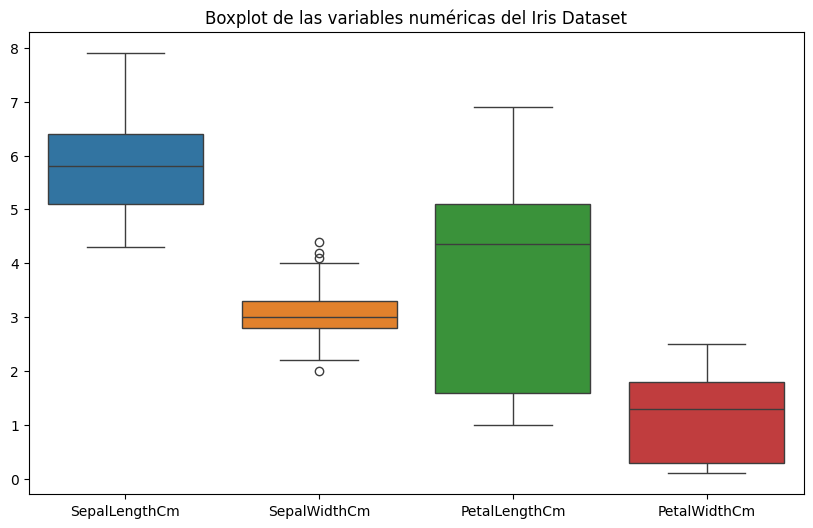

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
plt.title('Boxplot de las variables numéricas del Iris Dataset')
plt.show()

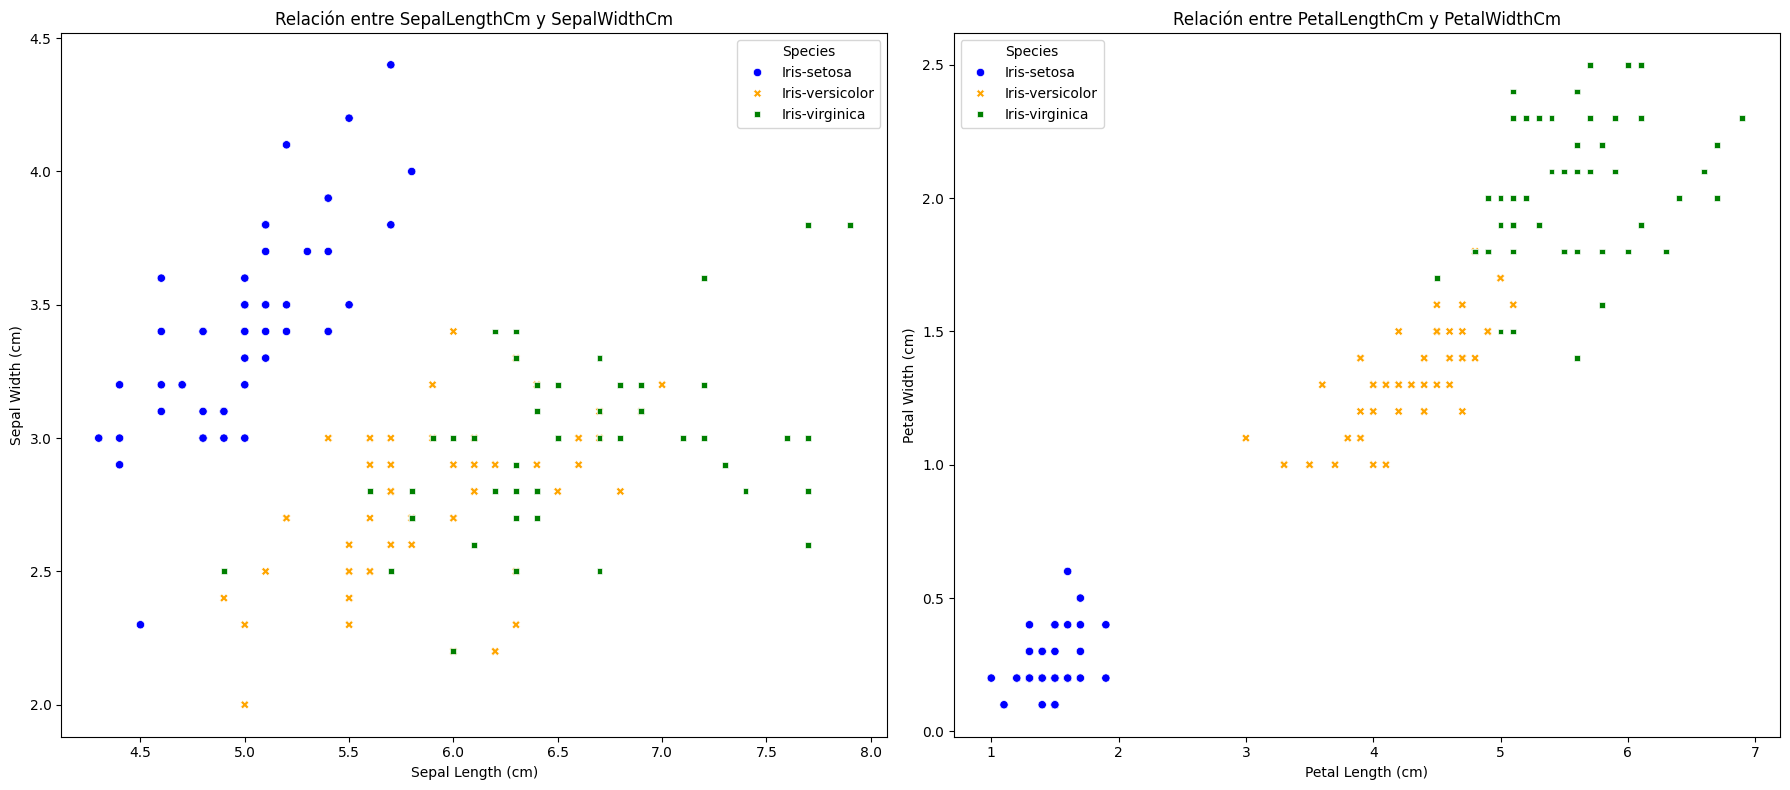

In [13]:

# Área de la figura
plt.figure(figsize=(18,8))

# PRIMER SUBPLOT: Sépalo
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Species"],
    style=df["Species"],
    palette=["blue", "orange", "green"]
)
plt.title("Relación entre SepalLengthCm y SepalWidthCm")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# SEGUNDO SUBPLOT: Pétalo
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df["PetalLengthCm"],
    y=df["PetalWidthCm"],
    hue=df["Species"],
    style=df["Species"],
    palette=["blue", "orange", "green"]
)
plt.title("Relación entre PetalLengthCm y PetalWidthCm")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()
